## Imports

In [1]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## The data

In [2]:
df = pd.read_csv("/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")
df = df.head(2000) #I'm going to read only 2000 of these because the whole data was taking too much time

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               2000 non-null   int64 
 1   Clothing ID              2000 non-null   int64 
 2   Age                      2000 non-null   int64 
 3   Title                    1652 non-null   object
 4   Review Text              1932 non-null   object
 5   Rating                   2000 non-null   int64 
 6   Recommended IND          2000 non-null   int64 
 7   Positive Feedback Count  2000 non-null   int64 
 8   Division Name            2000 non-null   object
 9   Department Name          2000 non-null   object
 10  Class Name               2000 non-null   object
dtypes: int64(6), object(5)
memory usage: 172.0+ KB


In [4]:
print(df.isnull().sum())
print(df.shape)

Unnamed: 0                   0
Clothing ID                  0
Age                          0
Title                      348
Review Text                 68
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name                0
Department Name              0
Class Name                   0
dtype: int64
(2000, 11)


So our data has some missing review texts and title which makes sense, for now let's just get rid of the missing data

In [5]:
df = df.dropna(axis=0)
print(df.isnull().sum())

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


In [6]:
df.shape

(1652, 11)

In [7]:
df = df.rename(columns={"Unnamed: 0":"Id"}) #Looking at the data Unnamed:0 was the index of the data so I just changed the name for better understanding

In [8]:
df

,Id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
1993,1993,1146,36,Gorgeous vintage glamour,"Besides being my favorite color to wear, this ...",5,1,1,General,Trend,Trend
1994,1994,1097,37,Fun summer dress.,Cute dress that is perfect for a casual summer...,4,1,10,General,Dresses,Dresses
1995,1995,867,38,Material,Material is hard to wear a bra under it,2,0,0,General,Tops,Knits
1998,1998,164,25,Super comfy,Loved the way these felt but like the previous...,4,1,0,Initmates,Intimate,Lounge


## Simple EDA

In [9]:
df['Review Text'].values[0]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [10]:
df.shape

(1652, 11)

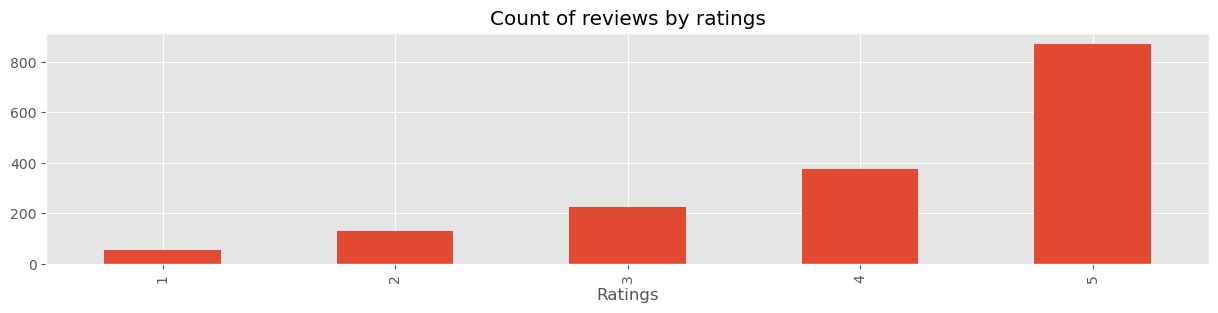

In [11]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind = 'bar',
      title = 'Count of reviews by ratings',
      figsize = (15,3))
ax.set_xlabel("Ratings")
plt.show()

## Using NLTK

In [12]:
example = df['Review Text'][18]
print(example)

A flattering, super cozy coat.  will work well for cold, dry days and will look good with jeans or a dressier outfit.  i am 5' 5'', about 135 and the small fits great.


In [13]:
#First, we just tokenize an example to see how it works
tokens = nltk.word_tokenize(example)
tokens[:10]

['A', 'flattering', ',', 'super', 'cozy', 'coat', '.', 'will', 'work', 'well']

In [14]:
tagged = nltk.pos_tag(tokens) #Parts of speech tagging is used in NLTK for example NN is a Noun and JJ is an Adjective
tagged[:10]

[('A', 'DT'),
 ('flattering', 'NN'),
 (',', ','),
 ('super', 'JJ'),
 ('cozy', 'NN'),
 ('coat', 'NN'),
 ('.', '.'),
 ('will', 'MD'),
 ('work', 'VB'),
 ('well', 'RB')]

In [15]:
entity = nltk.chunk.ne_chunk(tagged)#Use NLTK’s currently recommended named entity chunker to chunk the given list of tagged tokens
entity.pprint() #pretty print

(S
  A/DT
  flattering/NN
  ,/,
  super/JJ
  cozy/NN
  coat/NN
  ./.
  will/MD
  work/VB
  well/RB
  for/IN
  cold/JJ
  ,/,
  dry/JJ
  days/NNS
  and/CC
  will/MD
  look/VB
  good/JJ
  with/IN
  jeans/NNS
  or/CC
  a/DT
  dressier/JJ
  outfit/NN
  ./.
  i/VB
  am/VBP
  5/CD
  '/POS
  5/CD
  ''/''
  ,/,
  about/IN
  135/CD
  and/CC
  the/DT
  small/JJ
  fits/VBZ
  great/JJ
  ./.)


In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [17]:
sia = SentimentIntensityAnalyzer()

In [18]:
sia.polarity_scores("It really is a nice day!") #Compound ranges from -1 to 1 

{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.522}

In [19]:
sia.polarity_scores('This is such a boring dress')

{'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'compound': -0.3182}

In [20]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.936}

In [21]:
#Iterating over our chosen dataset
results = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
    text = row['Review Text']
    Id = row['Id']
    results[Id] = sia.polarity_scores(text)

  0%|          | 0/1652 [00:00<?, ?it/s]

In [22]:
# We adjust the results to our original dataset 
vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [23]:
vaders 

,Id,neg,neu,pos,compound,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,0.027,0.792,0.181,0.9427,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,0.226,0.340,0.434,0.5727,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,0.000,0.700,0.300,0.9291,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,0.000,0.853,0.147,0.9419,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,0.023,0.881,0.096,0.8004,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1993,0.017,0.786,0.197,0.9324,1146,36,Gorgeous vintage glamour,"Besides being my favorite color to wear, this ...",5,1,1,General,Trend,Trend
1648,1994,0.016,0.787,0.198,0.9261,1097,37,Fun summer dress.,Cute dress that is perfect for a casual summer...,4,1,10,General,Dresses,Dresses
1649,1995,0.167,0.833,0.000,-0.1027,867,38,Material,Material is hard to wear a bra under it,2,0,0,General,Tops,Knits
1650,1998,0.000,0.858,0.142,0.8945,164,25,Super comfy,Loved the way these felt but like the previous...,4,1,0,Initmates,Intimate,Lounge


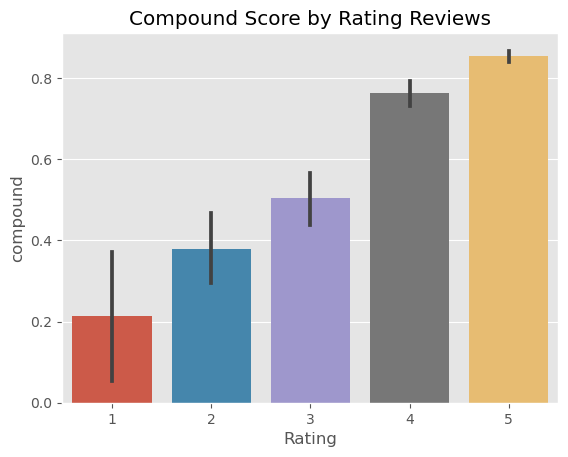

In [24]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title("Compound Score by Rating Reviews")
plt.show()

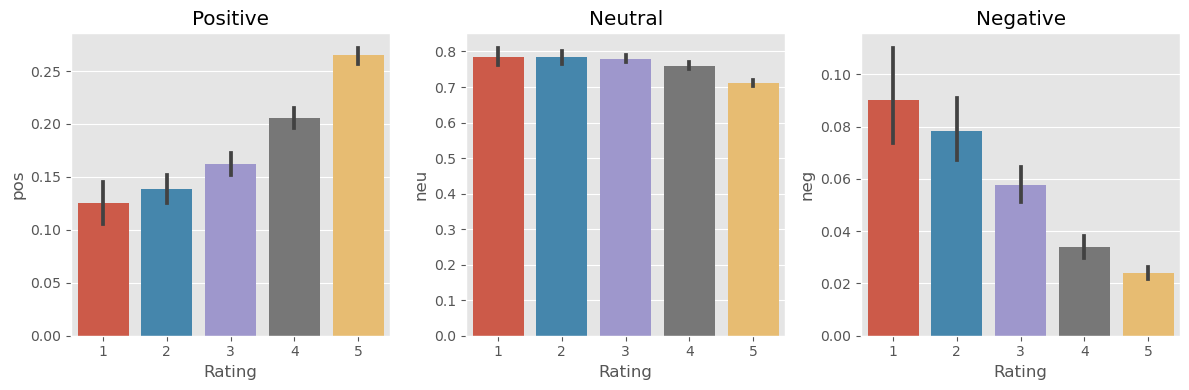

In [25]:
fig,axs = plt.subplots(1,3, figsize = (12,4))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()
plt.show()

The more high the Rating the higher the more positive is the review text and vice versa

## RoBerta model

In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
# Load model directly from HuggingFace
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [28]:
#vader results
print(example)
sia.polarity_scores(example)

A flattering, super cozy coat.  will work well for cold, dry days and will look good with jeans or a dressier outfit.  i am 5' 5'', about 135 and the small fits great.


{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.936}

In [29]:
#Roberta model
encoded_text = tokenizer(example, return_tensors='pt')#pt stands for pytorch
output = model(**encoded_text)
scores = output[0][0].detach().numpy()

In [30]:
scores = softmax(scores)

In [31]:
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0010254921, 'roberta_neu': 0.02470815, 'roberta_pos': 0.9742663}


In [32]:
def polarity_scores_roberta(x):
    encoded_text = tokenizer(x, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
    }
    return scores_dict

In [33]:
results = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
    text = row['Review Text']
    Id = row['Id']
    vader_results = sia.polarity_scores(text)
    vader_results_rename = {}
    for k,v in vader_results.items():
        vader_results_rename[f'vader_{k}'] = v
    roberta_results = polarity_scores_roberta(text)
    both = {**vader_results_rename, **roberta_results}
    results[Id] = both

  0%|          | 0/1652 [00:00<?, ?it/s]

We renamed the Vader results inorder to provide more clarity. Added them to a dictionary together and then we'll merge them into our Dataset

In [34]:
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

In [35]:
results_df.head()
# We now have both vader and roberta models results

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,0.027,0.792,0.181,0.9427,0.366803,0.380140,0.253057,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,0.226,0.340,0.434,0.5727,0.002247,0.004622,0.993131,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,0.000,0.700,0.300,0.9291,0.001239,0.006733,0.992028,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,0.000,0.853,0.147,0.9419,0.170491,0.283566,0.545943,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,0.023,0.881,0.096,0.8004,0.005863,0.072109,0.922028,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


## Comparing the results

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


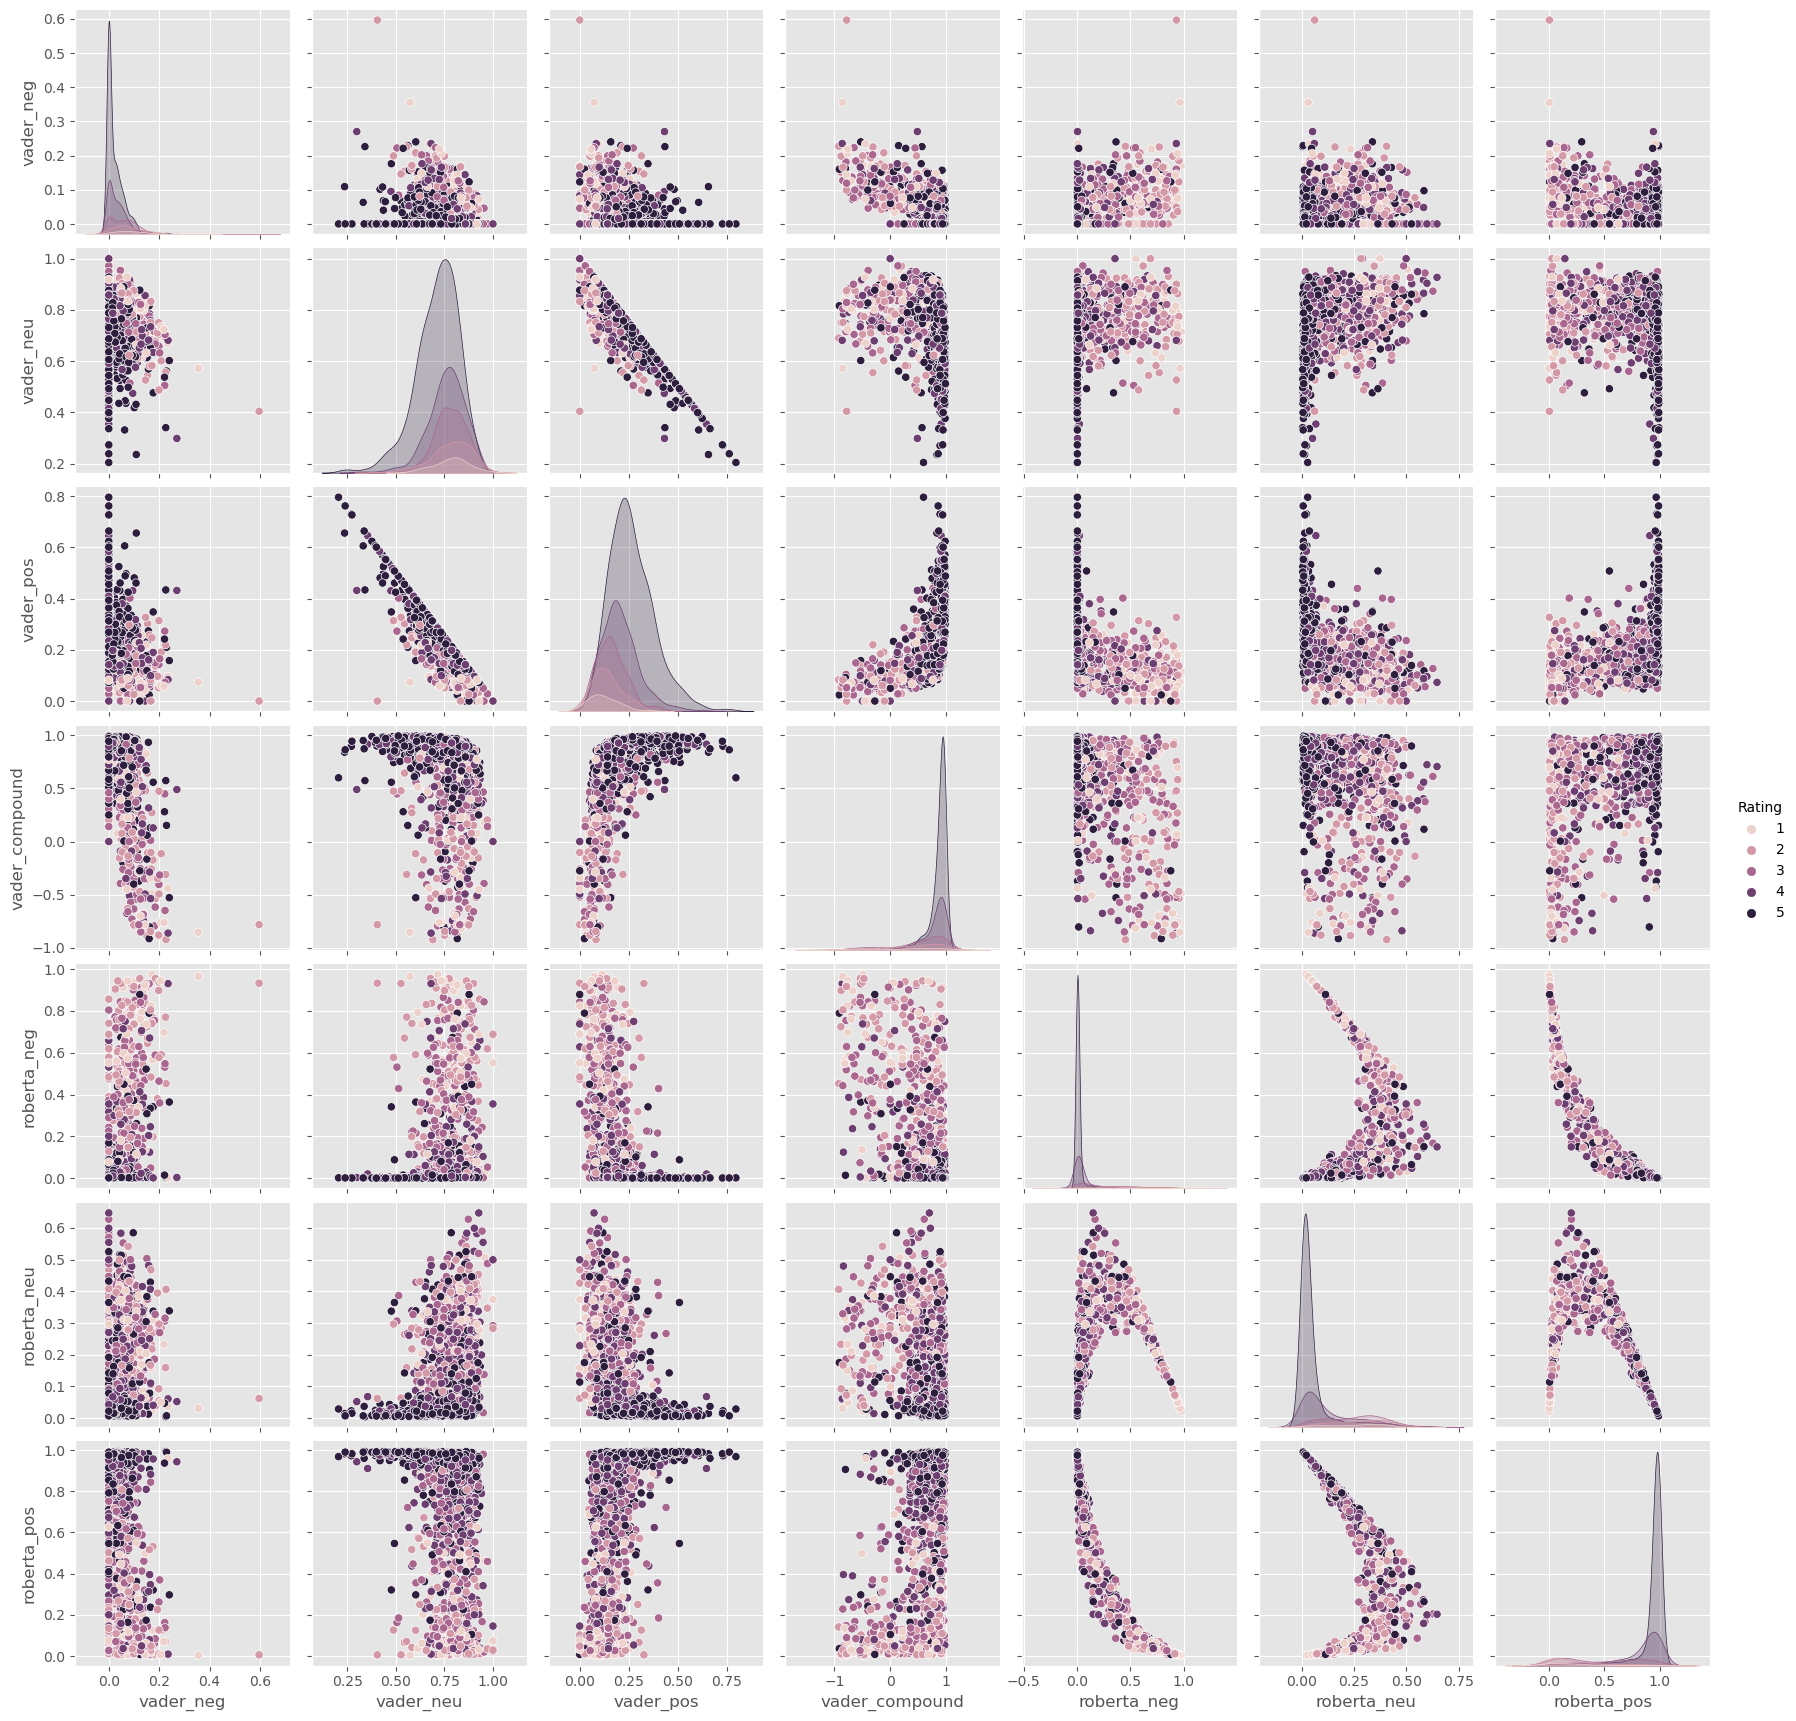

In [36]:
sns.pairplot(data=results_df, 
             vars = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue = 'Rating')
plt.show()

### Let's also check where our models got confused
So a result where the rating is pretty low but the models think that it's a positive review or vice versa

In [37]:
results_df.query('Rating == 1')\
.sort_values('roberta_pos',ascending=False)['Review Text'].values[0]

"I was very excited to order this top in red xs. so cute, but it was huge, shapeless and support thin! it had to go back. i should've looked at other reviews."

This review started off being positive and then it's pretty negative which probably confused the model

In [38]:
results_df.query('Rating == 1')\
.sort_values('vader_pos',ascending=False)['Review Text'].values[0]

'This top looked super cute online but when it came it was super short and boxy. looked like a tent on me. this one went back the same day it came!'

Similar story with this one

In [39]:
results_df.query('Rating == 5')\
.sort_values('roberta_neg',ascending=False)['Review Text'].values[0]

"Timeless skirt. just don't like the placement of the slit, so maybe i'll sew it up."

In [40]:
results_df.query('Rating == 5')\
.sort_values('vader_neg',ascending=False)['Review Text'].values[0]

'Loved the green color, the cut is super flattering, but alas, i do need hte petite, ti was a bit long and i looked a little lost. unfrotuantely, the color is sold out in petite :-('